In [2]:
#importing necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [14]:
#No null values
app_store = pd.read_csv('C:\\Users\\Mithunsomu\\Downloads\\AppleStore.csv',sep=',',index_col=0)
app_store.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [5]:
app_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [19]:
#Removing the track_name having Non English Values

app_store['track_name'] = app_store['track_name'].apply(lambda row: row.encode('ascii',errors='ignore').decode())

app_store['track_name']=app_store['track_name'].replace(['-','--'],'Random App')


In [20]:
(app_store.price==0).value_counts()

True     4056
False    3141
Name: price, dtype: int64

In [21]:
free_apps=(app_store.price==0).sum()
free_apps

4056

In [22]:
paid_apps=(app_store.price>0).sum()
paid_apps

3141

In [23]:
paid_apps_percent = (paid_apps/len(app_store))*100
paid_apps_percent

43.64318466027511

In [24]:
free_apps_percent = (free_apps/len(app_store))*100
free_apps_percent

56.35681533972489

In [26]:
paid_apps_percent=paid_apps/len(app_store.price)*100
paid_apps_percent

43.64318466027511

In [27]:
app_store['cont_rating'].value_counts()

4+     4433
12+    1155
9+      987
17+     622
Name: cont_rating, dtype: int64

In [28]:
#Checking if the column 'track_name' has all ASCII values
app_store['track_name'].map(lambda x:x.isascii()).value_counts()

True    7197
Name: track_name, dtype: int64

In [29]:
print('Free apps are :',str(sum(app_store.price==0)))
print('Super expensive apps :',str(sum(app_store.price>50)))
print('Which is about',sum(app_store.price>50)/len(app_store.price)*100)
outliers=app_store[app_store.price>50][['track_name','price','prime_genre','user_rating']]
outliers


Free apps are : 4056
Super expensive apps : 7
Which is about 0.09726274836737529


,track_name,price,prime_genre,user_rating
129,Proloquo2Go - Symbol-based AAC,249.99,Education,4.0
184,NAVIGON Europe,74.99,Navigation,3.5
1324,Articulation Station Pro,59.99,Education,4.5
1714,LAMP Words For Life,299.99,Education,4.0
2541,Articulation Test Center Pro,59.99,Education,4.5
3043,KNFB Reader,99.99,Productivity,4.5
3899,FineScanner Pro - PDF Document Scanner App + OCR,59.99,Business,4.0


In [19]:
#Checking if there are any remaning null values
app_store.isnull().sum()

id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [32]:
#Removing '+' sign from the column to change it's type to int
app_store['cont_rating']=app_store['cont_rating'].replace({'\+':''},regex=True)


In [33]:
#Changing the Data type from object to int to 
app_store['cont_rating']=app_store['cont_rating'].astype('int64')
app_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   int64  
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(9), object(4)
memory

In [34]:
(app_store.loc[:]==np.NAN).sum()


id                  0
track_name          0
size_bytes          0
currency            0
price               0
rating_count_tot    0
rating_count_ver    0
user_rating         0
user_rating_ver     0
ver                 0
cont_rating         0
prime_genre         0
sup_devices.num     0
ipadSc_urls.num     0
lang.num            0
vpp_lic             0
dtype: int64

In [38]:
app_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 1 to 11097
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   int64  
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(9), object(4)
memory

In [39]:
#Checking the highest paid app in the app_store dataset
max(app_store.price)
#Above code output $299.99
app_store[app_store.price==299.99]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1714,551215116,LAMP Words For Life,583263232,USD,299.99,41,0,4.0,0.0,1.5.5,4,Education,24,5,1,1


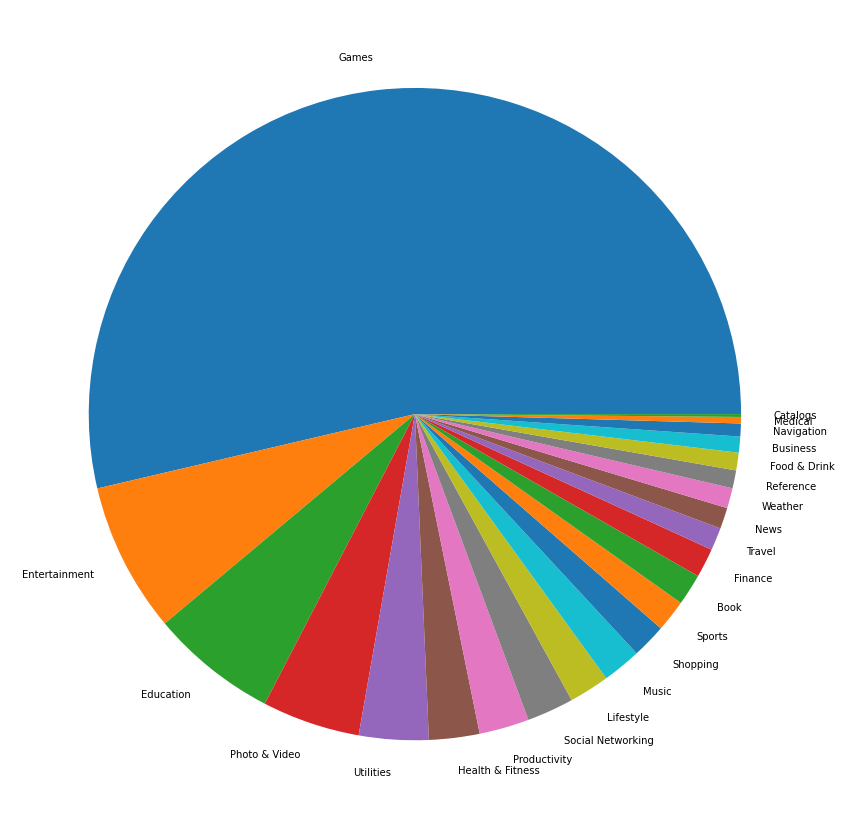

In [40]:
#BlueOrangeWapang = ['#fc910d','#fcb13e','#239cd3','#1674b1','#ed6d50']
plt.figure(figsize=(15,15))
label_names=app_store.prime_genre.value_counts().index
size = app_store.prime_genre.value_counts().tolist()
plt.pie(size, labels=label_names)#, colors=BlueOrangeWapang)


plt.show()

#3862 apps are games - 3862/7197*100 = 53.66%
#573 - Entertainment - 573/7197*100 = 7.96%
#453 - Education - 453/7197*100 = 6.29%
#2309 - Others - 2309/7197*100 = 32%

312.9130434782609

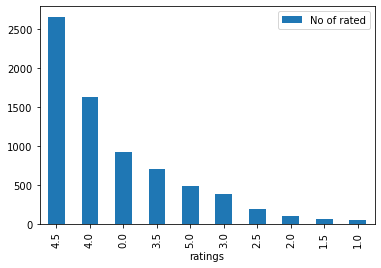

In [41]:
#Ratings
dic={'ratings':app_store.user_rating.value_counts().index,
     'No of rated':app_store.user_rating.value_counts().tolist()}
df=pd.DataFrame(dic)
df.plot(x='ratings',y='No of rated',kind='bar')
plt.show()

<Figure size 7200x7200 with 0 Axes>

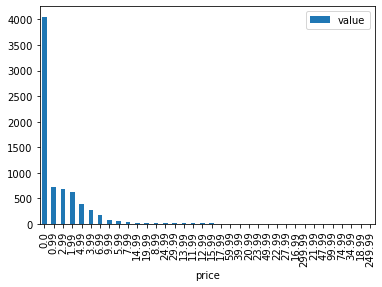

In [42]:
plt.figure(figsize=(100,100))
price=app_store.price.value_counts().index
value=app_store.price.value_counts().tolist()
dic={'price':price,'value':value}
df=pd.DataFrame(dic)

df.plot('price','value',kind='bar')
plt.show()

<Figure size 7200x7200 with 0 Axes>

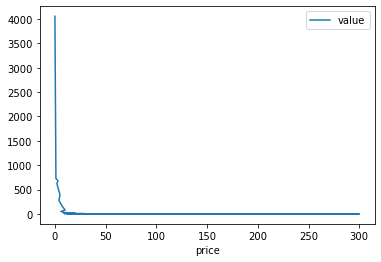

In [45]:
plt.figure(figsize=(100,100))
price=app_store.price.value_counts().index
value=app_store.price.value_counts().tolist()
dic={'price':price,'value':value}
df=pd.DataFrame(dic)

df.plot('price','value',kind='line')

plt.show()

<Figure size 7200x7200 with 0 Axes>

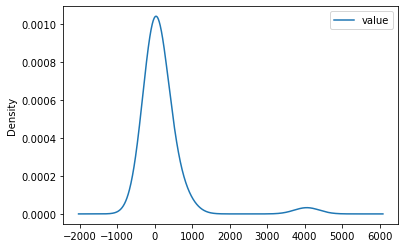

In [46]:
#Drawing a Kenrel density graph to know the density changes
plt.figure(figsize=(100,100))
price=app_store.price.value_counts().index
value=app_store.price.value_counts().tolist()
dic={'price':price,'value':value}
df=pd.DataFrame(dic)

df.plot('price','value',kind='kde')
plt.show()

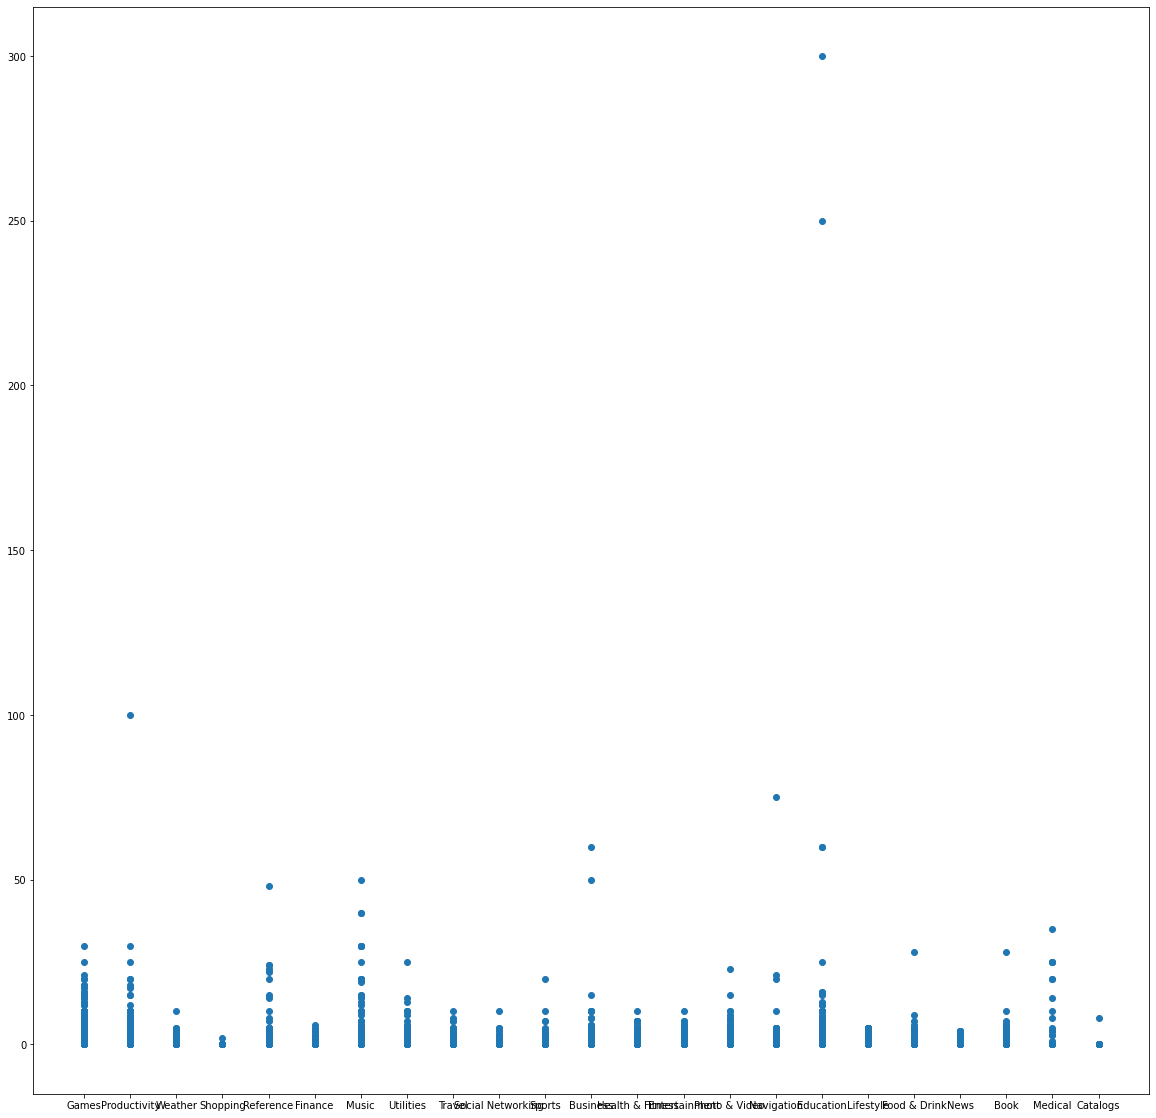

In [47]:

#Drawing a scatterplot to know the prices of the categories in the prime_genre 
plt.figure(figsize=(20,20))

plt.scatter(app_store.prime_genre,app_store.price)